In [79]:
import sys
try:
    del sys.modules["spnhelp"]
except:
    pass
import spnhelp
try:
    del sys.modules["clg_revised"]
except:
    pass
from clg_revised import noise, Norm
from math import sqrt
from spn.io.Text import spn_to_str_equation
import pandas as pd
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
import numpy as np
import matplotlib.pyplot as plt
from spn.structure.Base import get_number_of_nodes, get_depth
from spn.algorithms.Marginalization import marginalize
from spn.algorithms.Inference import likelihood
import scipy.stats as stats
from IPython.display import display

     X    Y    Z    J
X  0.0  0.0  0.0  0.0
Y  0.0  0.0  0.0  0.0
Z  0.0  0.0  1.0  1.0
J  0.0  0.0  1.0  2.0


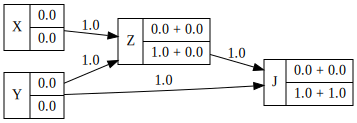

In [65]:

W = "X" @ noise
X = "X" @ noise
Y = "Y" @ noise
Z = "Z" @ (X + Y + noise)
J = "J" @ (Z + noise + Y)

K = "K" @ noise
L = "L" @ (K + noise)

# Z & L
X.condition(0)
Y.condition(0)
print(X.get_Σ())
# samples = X.forward_sample(10000)
# print(np.cov(samples, rowvar=False))
X.get_graph(True)

     X    Y    Z    J
X  1.0  0.0  1.0  1.0
Y  0.0  1.0  1.0  2.0
Z  1.0  1.0  3.0  4.0
J  1.0  2.0  4.0  7.0


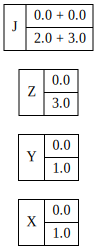

In [66]:
copy = X.deepcopy()
copy.castrate_roots()

print(copy.get_Σ())
np.linalg.inv(copy.get_Σ())
copy.get_graph(True)

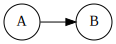

     A    B
A  1.0  1.0
B  1.0  2.0
[] discretizing ['A'] and generating cartesian product of size 2
[[3.6 2.7]
 [2.7 3.7]]


In [83]:
from itertools import product
from spn.structure.Base import Node, Sum, Product, assign_ids, rebuild_scopes_bottom_up



A = "A" @ noise
B = "B" @ (A + noise + 1)
# I = "I" @ noise
# C = "C" @ (B + noise + 1)
# C = "C" @ (A + noise + 3)
# D = "D" @ (B + C + noise - 4)

N = "N" @ noise
M = "M" @ (N + noise)

# A & N

display(A.get_graph())
print(A.get_Σ())

spn = spnhelp.pgm_to_spn(A, eps = 0.4)
samples = spnhelp.sample_from_spn(spn, 10000)
print(np.cov(samples, rowvar=False).round(1))

In [84]:
print(get_number_of_nodes(spn))
print(get_depth(spn))

10
5


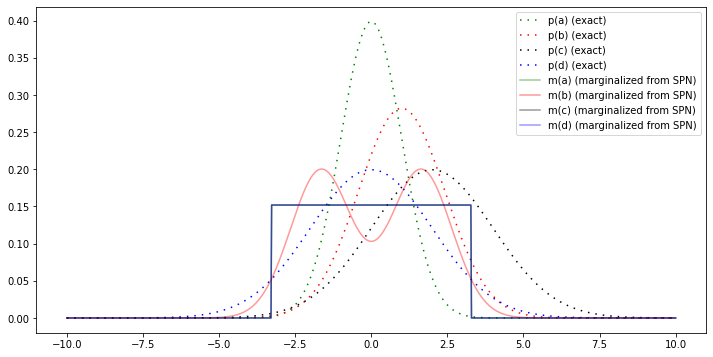

In [70]:
spn_marg_a = marginalize(spn, [0])
spn_marg_b = marginalize(spn, [1])
spn_marg_c = marginalize(spn, [2])
spn_marg_d = marginalize(spn, [3])

plt.rcParams["figure.figsize"] = (12, 6)

x = np.linspace(-10, 10, 1000)
plt.plot(x, stats.norm.pdf(x, A.current_mean, A.current_sd), label = "p(a) (exact)", linestyle =  (0, (1, 4)), c="g")
plt.plot(x, stats.norm.pdf(x, B.current_mean, B.current_sd), label = "p(b) (exact)", linestyle =  (0, (1, 4)), c="r")
plt.plot(x, stats.norm.pdf(x, C.current_mean, C.current_sd), label = "p(c) (exact)", linestyle =  (0, (1, 4)), c="k")
plt.plot(x, stats.norm.pdf(x, D.current_mean, D.current_sd), label = "p(d) (exact)", linestyle =  (0, (1, 4)), c="b")

nan_fill = np.full_like(x, np.nan)
plt.plot(x, likelihood(spn_marg_a, np.c_[x.reshape(-1, 1), nan_fill, nan_fill, nan_fill]), label = "m(a) (marginalized from SPN)", c="g", alpha=0.4)
plt.plot(x, likelihood(spn_marg_b, np.c_[nan_fill, x.reshape(-1, 1), nan_fill, nan_fill]), label = "m(b) (marginalized from SPN)", c="r", alpha=0.4)
plt.plot(x, likelihood(spn_marg_c, np.c_[nan_fill, nan_fill, x.reshape(-1, 1), nan_fill]), label = "m(c) (marginalized from SPN)", c="k", alpha=0.4)
plt.plot(x, likelihood(spn_marg_d, np.c_[nan_fill, nan_fill, nan_fill, x.reshape(-1, 1)]), label = "m(d) (marginalized from SPN)", c="b", alpha=0.4)
plt.legend();

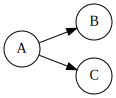

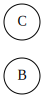

In [71]:
A = "A" @ noise
B = "B" @ (A + noise + 1)
C = "C" @ (A + noise + 3)

copy = A.deepcopy()
display(copy.get_graph())
display(copy.castrate_roots().get_graph())

[2403017620976, 2403017090352, 2403017095152, 2403017656928]
     A    B    C    D
A  1.0  1.0  1.0  1.0
B  1.0  2.0  2.0  2.0
C  1.0  2.0  3.0  3.0
D  1.0  2.0  3.0  4.0


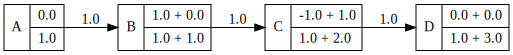

[2403017669168, 2403017659520, 2403017663792]
     B    C    D
B  2.0  2.0  2.0
C  2.0  3.0  3.0
D  2.0  3.0  4.0


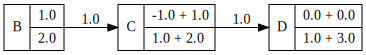

[2403017660720, 2403017661056]
     C    D
C  3.0  3.0
D  3.0  4.0


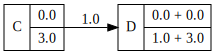

[2403017668592]
     D
D  4.0


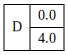

In [72]:

A = "A" @ noise
"D" @ ("C" @ ("B" @ (A + noise + 1) + noise - 1) + noise)
# "C" @ (A + noise)
# "D" @ (A + noise)


B = A.deepcopy().castrate_roots()
C = B.deepcopy().castrate_roots()
D = C.deepcopy().castrate_roots()

for x in [A, B, C, D]:
    print(list(map(lambda n: id(n) , x.get_nodes())))
    print(x.get_Σ())
    display(x.get_graph(True))